# **Unveiling Consumer Financial Experiences: Analyzing CFPB Complaints**

# Introduction

Data Source: The dataset used in this project is sourced from Kaggle, a platform for data science and machine learning competitions. The dataset specifically comes from the Consumer Financial Protection Bureau (CFPB) Complaint Database.

About the Dataset: The CFPB Complaint Database contains complaints submitted by consumers regarding various financial products and services. These complaints cover a wide range of issues, including but not limited to credit cards, mortgages, student loans, and debt collection. Each complaint typically includes details such as the consumer's narrative, the type of financial product or service involved, the company being complained about, and the resolution status.

Project Objective: The objective of this project is to analyze the CFPB complaints data to gain insights into consumer experiences with financial products and services. This analysis will involve several steps, including data cleaning and preprocessing, exploratory data analysis (EDA), and visualization. By analyzing the complaints data, we aim to identify common issues, trends over time, sentiments, and other valuable insights that can help improve the financial marketplace.

Data Description: The dataset consists of several columns, including:

Date Received: The date when the complaint was submitted.

Product: The type of financial product or service associated with the complaint (e.g., credit reporting, debt collection).

Issue: The specific issue or problem reported by the consumer.

Consumer Complaint Narrative: The detailed narrative provided by the consumer describing their experience.

Company: The company against which the complaint is filed.

State: The state where the consumer resides.

Zip Code: The zip code of the consumer.

Tags: Additional information or tags associated with the complaint.

Consumer Consent Provided: Indicates whether the consumer provided consent to publish their complaint narrative.

Company Response to Consumer: The response provided by the company to the consumer's complaint.

Timely Response: Indicates whether the company responded to the complaint within the specified time frame.

# Data Processing
Data Processing: The first step after loading the data is to process the data. In this step, I will be handling missing values, standardizing formats, and removing irrelevant information.

In [8]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a pandas DataFrame

df = pd.read_csv(r"C:\Users\olape\OneDrive\Desktop\Personal Projects\consumer_complaints.csv")

# Display the first few rows of the dataset to verify it's loaded correctly
df.head()

C:\Users\olape\AppData\Local\Temp\ipykernel_8068\2803680057.py:9: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\olape\OneDrive\Desktop\Personal Projects\consumer_complaints.csv")


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [10]:
# Count the number of rows in the DataFrame
num_rows = df.shape[0]

# Print the number of rows
print("Number of Rows:", num_rows)


Number of Rows: 555957


In [9]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values in each column
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to display the results
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data.sort_values(by='Percentage', ascending=False, inplace=True)

# Display columns with missing values
print("Columns with Missing Values:")
print(missing_data[missing_data['Missing Values'] > 0])


Columns with Missing Values:
                              Missing Values  Percentage
consumer_complaint_narrative          489151   87.983603
tags                                  477998   85.977513
company_public_response               470833   84.688744
consumer_consent_provided             432499   77.793606
sub_issue                             343335   61.755675
sub_product                           158322   28.477382
state                                   4887    0.879025
zipcode                                 4505    0.810314


consumer_complaint_narrative: This column has the highest percentage of missing values (87.98%). It contains detailed narratives provided by consumers, and missing values likely indicate cases where consumers did not provide additional information beyond the standard complaint form.

tags: This column has missing values for 85.98% of the rows. It likely contains additional information or tags associated with the complaints, but many entries are missing this information.

company_public_response: Approximately 84.69% of entries in this column are missing. This column likely contains responses provided by companies to address consumer complaints publicly.

consumer_consent_provided: About 77.79% of entries in this column are missing. It indicates whether consumers provided consent to publish their complaint narrative.

sub_issue: This column has missing values for 61.76% of the rows. It likely contains sub-categories or more specific descriptions of the issues reported by consumers.

sub_product: Around 28.48% of entries in this column are missing. It represents sub-categories of financial products or services associated with the complaints.

state: Only 0.88% of entries in this column are missing, which is relatively small compared to other columns. It represents the state where the consumer resides.

zipcode: Approximately 0.81% of entries in this column are missing. It represents the zip code of the consumer.

Sub_product, state, and zipcode are important coloumns in the dataset and has less than 30% of missing values, hence I will be dropping the rows with the missing values in these coloumns.

Given that the 'sub_product,' 'state,' and 'zipcode' columns are vital for our analysis and have missing values in less than 30% of the dataset, it's reasonable to drop the rows with the missing values. Retaining only data with complete information in these columns ensures the integrity and accuracy of our analysis, focusing on the most relevant and informative data points.

In [11]:
# Drop rows with missing values under specific columns
df.dropna(subset=['sub_product', 'state', 'zipcode'], inplace=True)

# Verify that rows with missing values under those columns have been dropped
print("Number of Rows after dropping missing values:", df.shape[0])


Number of Rows after dropping missing values: 393942


In [12]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])


Columns with Missing Values:
sub_issue                       274032
consumer_complaint_narrative    347729
company_public_response         340848
tags                            338194
consumer_consent_provided       312445
dtype: int64


In [13]:
# Drop irrelevant columns (columns not needed for analysis)
irrelevant_columns = ['sub_issue', 'consumer_complaint_narrative', 'company_public_response', 'tags', 'consumer_consent_provided']
df.drop(columns=irrelevant_columns, inplace=True)


In [14]:
# Standardize date formats
df['date_received'] = pd.to_datetime(df['date_received'])
df['date_sent_to_company'] = pd.to_datetime(df['date_sent_to_company'])

# check processed data set
df.head()


,date_received,product,sub_product,issue,company,state,zipcode,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,2013-08-30,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",U.S. Bancorp,CA,95993,Referral,2013-09-03,Closed with explanation,Yes,Yes,511074
1,2013-08-30,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,CA,91104,Referral,2013-09-03,Closed with explanation,Yes,Yes,511080
3,2013-08-30,Student loan,Non-federal student loan,Repaying your loan,"Navient Solutions, Inc.",MD,21402,Email,2013-08-30,Closed with explanation,Yes,Yes,510326
4,2013-08-30,Debt collection,Credit card,False statements or representation,Resurgent Capital Services L.P.,GA,30106,Web,2013-08-30,Closed with explanation,Yes,Yes,511067
7,2013-08-30,Bank account or service,Checking account,Deposits and withdrawals,Bank of America,IL,60660,Referral,2013-09-04,Closed with explanation,Yes,No,511116


## Analysis and Visualization: Unveiling Consumer Financial Experiences

In this section, I delve into the Consumer Financial Protection Bureau (CFPB) complaints dataset to gain insights into consumer experiences with financial products and services. Through a combination of data analysis and visualization techniques, I aim to uncover trends, identify common issues, and analyze sentiment in consumer narratives.

Exploring Complaint Volume Over Time:
I will begin by examining the volume of complaints received over time. Through a time series analysis, we visualize the trend in complaint volume to understand the overall activity level and identify any significant changes or patterns over the years.

Identifying Common Issues:
Next, I will investigate the most frequent issues reported by consumers. By creating a bar chart showcasing the top 10 most common issues, shed light on recurring problems within the financial marketplace, helping stakeholders prioritize areas for improvement.

Analyzing Sentiment for the topmost issue:
In addition to quantifying complaint volume and identifying common issues, I will analyze the sentiment expressed in the topmost issue. Applying sentiment analysis techniques to the issue allows us to gauge the overall sentiment polarity (positive, negative, or neutral) and gain deeper insights into consumer experiences and perceptions.

Visualization Tools:
Throughout our analysis, I will leverage visualization tools such as Matplotlib and Seaborn to create visually compelling plots and charts that effectively communicate our findings.



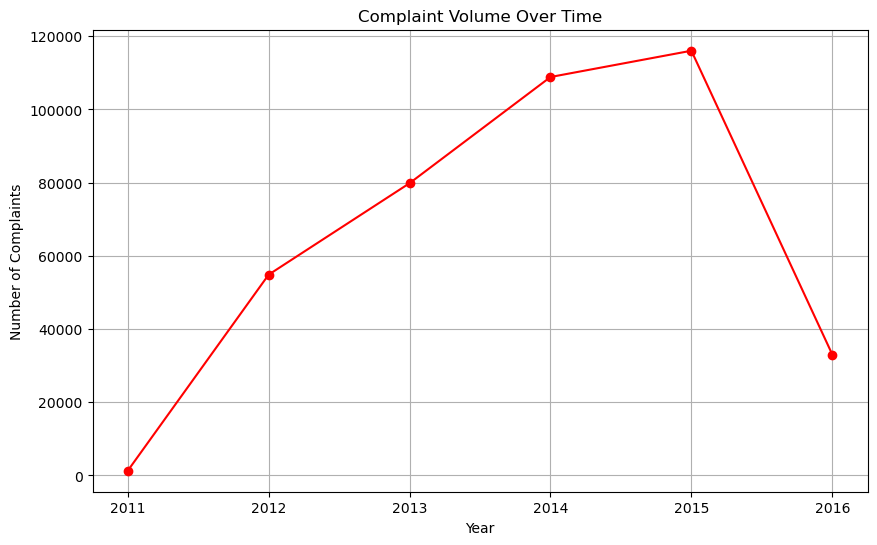

In [18]:
# Plotting complaint volume over time with a line graph and markers
plt.figure(figsize=(10, 6))
df['date_received'].dt.year.value_counts().sort_index().plot(kind='line', marker='o', color='red')
plt.title('Complaint Volume Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Complaints')
plt.grid(True)  # grid for better readability
plt.show()


Trend Analysis of Consumer Complaints (2011-2016)

From 2011 to 2016, the volume of consumer complaints showed an interesting pattern, as observed from the data:

In 2011, the number of complaints started at a relatively low level, estimated to be around 0.

By the following year, 2012, there was a notable increase in complaints, rising sharply to over 5,500.

This upward trend continued into 2013, with complaints escalating further to approximately 8,000.

The trend persisted in 2014, as complaints surged to around 11,000.

However, in 2015, there was a slight increase, with complaints reaching approximately 11,500.

Notably, in 2016, there was a significant decrease in the number of complaints, dropping to about 3,000.

Insight:
The visualization illustrates a consistent upward trajectory in consumer complaints from 2011 to 2015, indicating growing dissatisfaction or issues within the financial marketplace. However, the sharp decline in complaints observed in 2016 suggests a notable shift. It's plausible that financial institutions intensified efforts to address consumer grievances, resulting in the substantial reduction in complaints during this period.

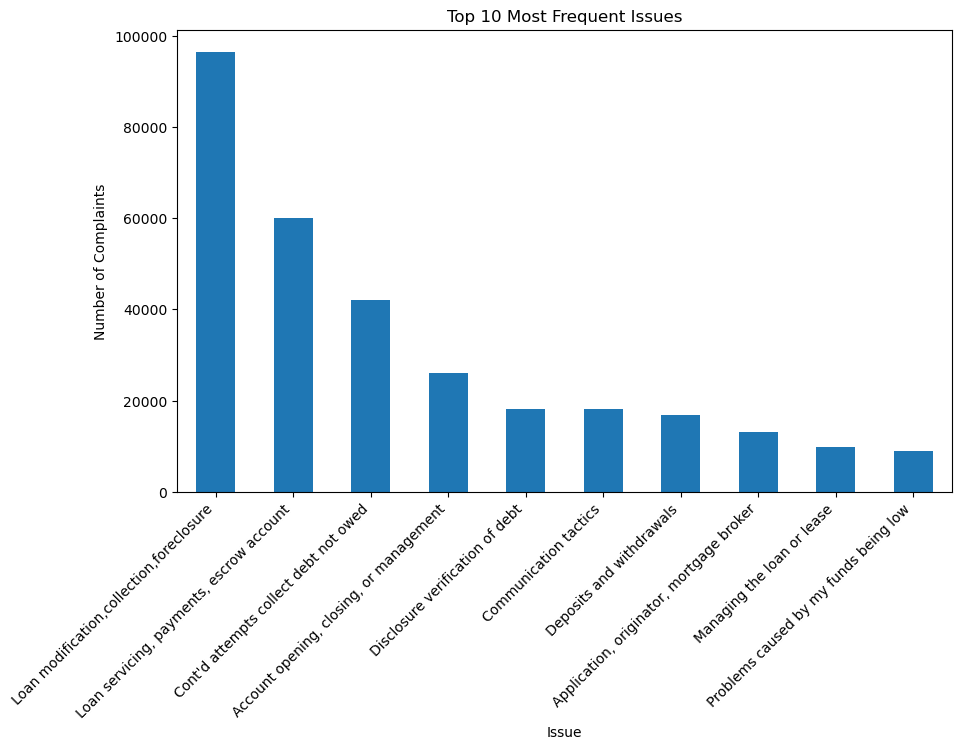

In [19]:
# Plotting the most frequent issues
plt.figure(figsize=(10, 6))
top_issues = df['issue'].value_counts().nlargest(10)
top_issues.plot(kind='bar')
plt.title('Top 10 Most Frequent Issues')
plt.xlabel('Issue')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.show()


"Loan modification, collection, and foreclosures" is the topmost issue, I can focus on analyzing sentiment specifically for complaints related to this issue. 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\olape\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\olape\AppData\Local\Temp\ipykernel_8068\2074582710.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_complaints['sentiment'] = loan_complaints['company_response_to_consumer'].apply(calculate_sentiment)


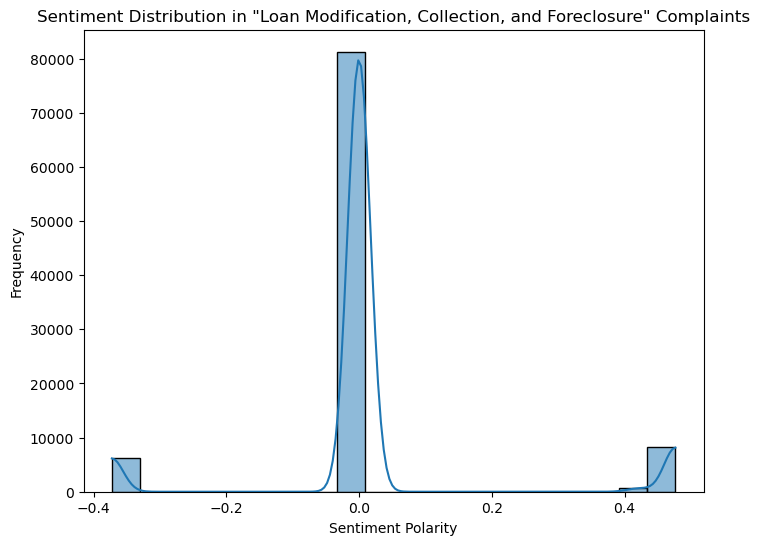

In [25]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
nltk.download('vader_lexicon')  # Download the Vader lexicon for sentiment analysis
sia = SentimentIntensityAnalyzer()

# Filter DataFrame for complaints related to "Loan modification, collection, and foreclosures"
loan_complaints = df[df['issue'] == 'Loan modification,collection,foreclosure']

# Function to calculate sentiment polarity
def calculate_sentiment(text):
    sentiment_score = sia.polarity_scores(str(text))
    return sentiment_score['compound']

# Apply sentiment analysis to the filtered complaints
loan_complaints['sentiment'] = loan_complaints['company_response_to_consumer'].apply(calculate_sentiment)

# Plotting sentiment distribution
plt.figure(figsize=(8, 6))
sns.histplot(loan_complaints['sentiment'], bins=20, kde=True)
plt.title('Sentiment Distribution in "Loan Modification, Collection, and Foreclosure" Complaints')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


The sentiment analysis of complaints related to 'Loan modification, collection, and foreclosures' reveals that the majority of sentiments expressed are neutral, with the highest bar in the sentiment distribution plot centered around 0. This suggests that consumers are generally expressing their concerns or experiences without conveying strong positive or negative emotions. While neutral sentiment predominates, it's important to further analyze the context and content of the complaints to gain a comprehensive understanding of consumer feedback regarding these financial activities.

In [31]:
# Calculate the total number of complaints for each company
company_complaints_total_sorted = company_complaints_total.sort_values(by='total_complaints', ascending=False)

# Display the list of companies with the total number of complaints from highest to lowest
print("List of Companies with Total Number of Complaints (from highest to lowest):")
print(company_complaints_total_sorted)


# Find the company with the most complaints
company_with_most_complaints = company_complaints_total.loc[company_complaints_total['total_complaints'].idxmax()]

# Display thecompany with the most complaints
print("\nCompany with the Most Complaints:")
print(company_with_most_complaints)


List of Companies with Total Number of Complaints (from highest to lowest):
                                    company  total_complaints
0                           Bank of America             48223
1                     Wells Fargo & Company             38572
2                      JPMorgan Chase & Co.             25682
3                                     Ocwen             20816
4                       Nationstar Mortgage             13157
...                                     ...               ...
3063                           Spiriter LLC                 1
3064            AMRON PROFESSIONAL SERVICES                 1
3065       Hometown Mortgage Services, Inc.                 1
3066  Homeowner's Mortgage of America, Inc.                 1
3571             Pohler and Associates, LLC                 1

[3572 rows x 2 columns]

Company with the Most Complaints:
company             Bank of America
total_complaints              48223
Name: 0, dtype: object


The list ranks companies based on total complaints, with Bank of America leading at 48,223 complaints, followed by Wells Fargo & Company with 38,572. JPMorgan Chase & Co. ranks third with 25,682 complaints. Notable mentions include Ocwen with 20,816 complaints and Nationstar Mortgage with 13,157.

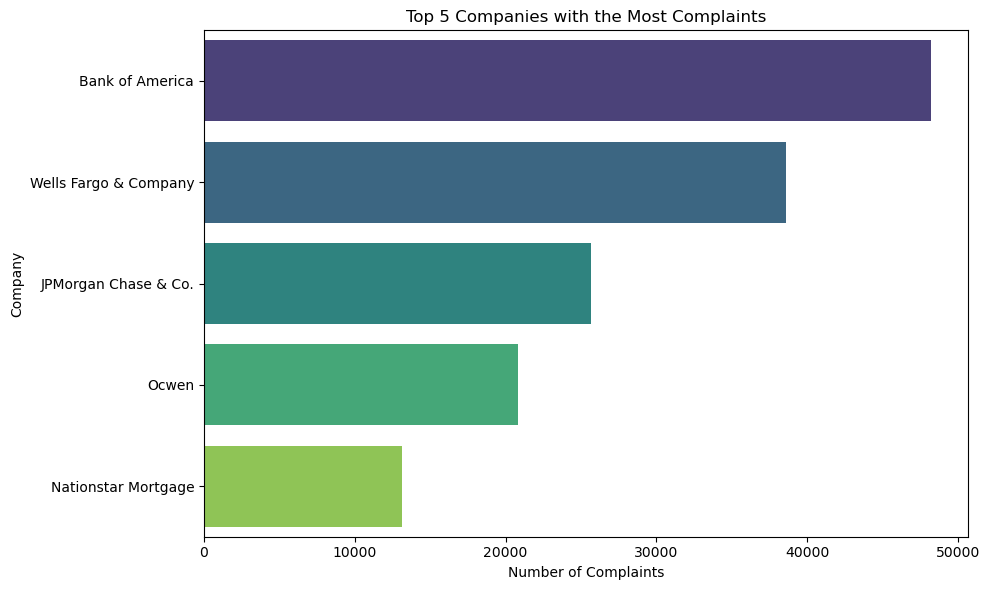

In [32]:
# Filter the list of companies to include only the top 5 with the most complaints
top_5_companies = company_complaints_total_sorted.head(5)

# Create a bar chart for the distribution of total complaints among the top 5 companies
plt.figure(figsize=(10, 6))
sns.barplot(x='total_complaints', y='company', data=top_5_companies, palette='viridis')
plt.title('Top 5 Companies with the Most Complaints')
plt.xlabel('Number of Complaints')
plt.ylabel('Company')
plt.tight_layout()
plt.show()


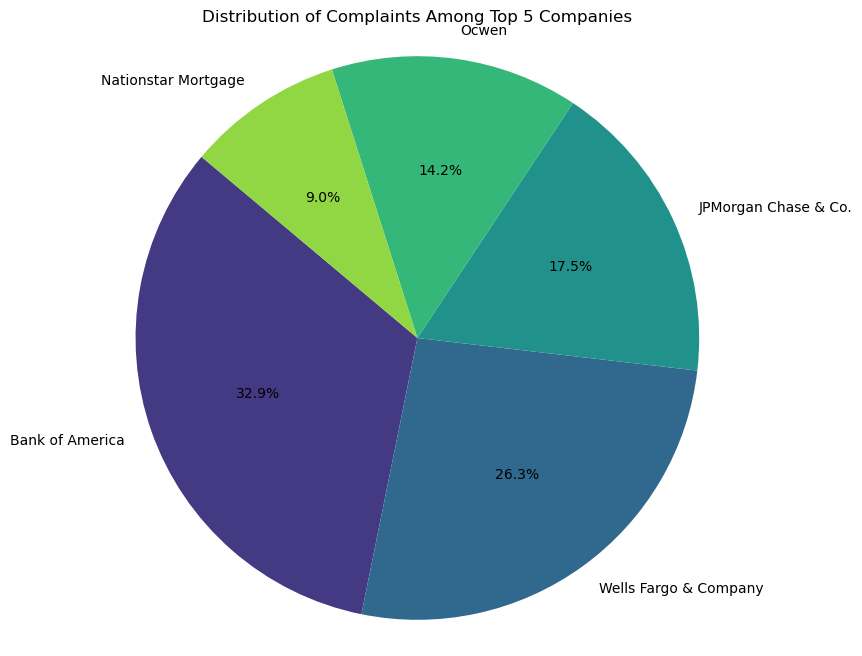

In [33]:
# Create a pie chart for the distribution of complaints among the top 5 companies
plt.figure(figsize=(8, 8))
plt.pie(top_5_companies['total_complaints'], labels=top_5_companies['company'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(top_5_companies)))
plt.title('Distribution of Complaints Among Top 5 Companies')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


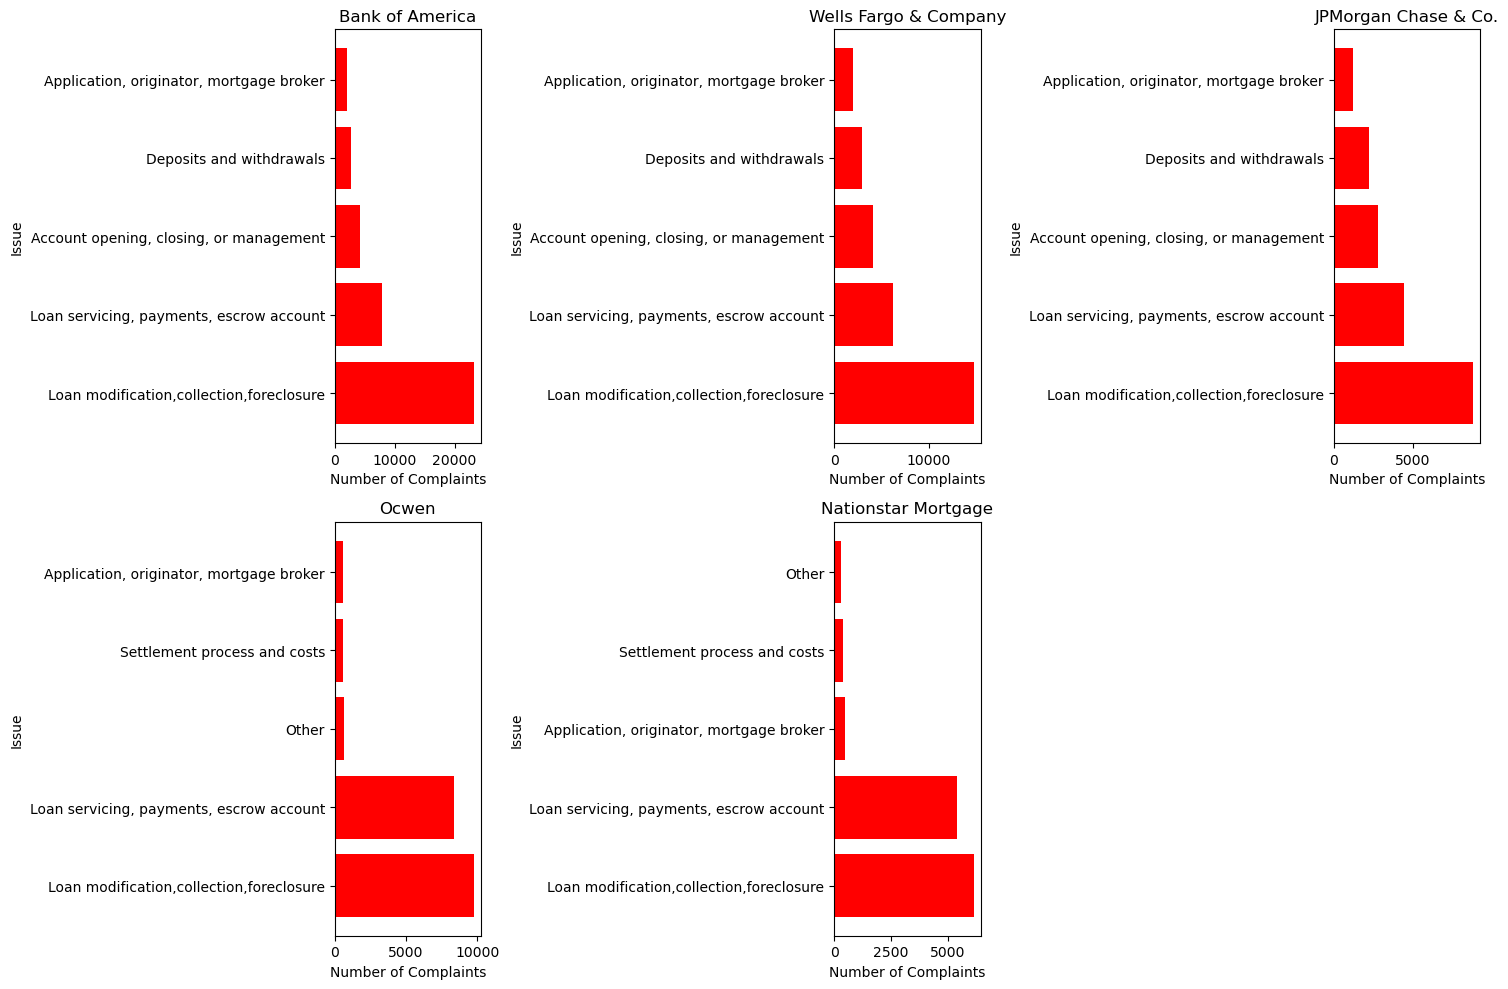

In [37]:
# Filter the dataset to include only complaints related to the top 5 companies
top_5_company_complaints = df[df['company'].isin(top_5_companies['company'])]

# Group the data by company and issue to count the number of complaints for each issue within each company
top_5_company_issue_counts = top_5_company_complaints.groupby(['company', 'issue']).size().reset_index(name='complaints_count')

# Create subplots for each company to visualize the top issues
plt.figure(figsize=(15, 10))

for i, company in enumerate(top_5_companies['company']):
    plt.subplot(2, 3, i+1)
    company_issue_counts = top_5_company_issue_counts[top_5_company_issue_counts['company'] == company]
    top_issues = company_issue_counts.nlargest(5, 'complaints_count')
    plt.barh(top_issues['issue'], top_issues['complaints_count'], color='red')
    plt.title(company)
    plt.xlabel('Number of Complaints')
    plt.ylabel('Issue')

plt.tight_layout()
plt.show()


The consistent appearance of "loan modification, collection, and foreclosures" and "loan servicing, payments, and escrow account" as the top two issues across the top 5 companies suggests several insights:

Industry-Wide Challenges: The recurrence of these issues across multiple companies indicates that they are pervasive challenges within the financial industry, particularly in sectors such as mortgage lending and servicing. These issues may stem from systemic issues in processes, regulations, or customer communication.

Consumer Priorities: The prevalence of these issues suggests that consumers are most concerned about matters related to loan modifications, collections, payments, and escrow accounts. This insight can guide companies in prioritizing their efforts to address these key pain points and improve customer satisfaction.

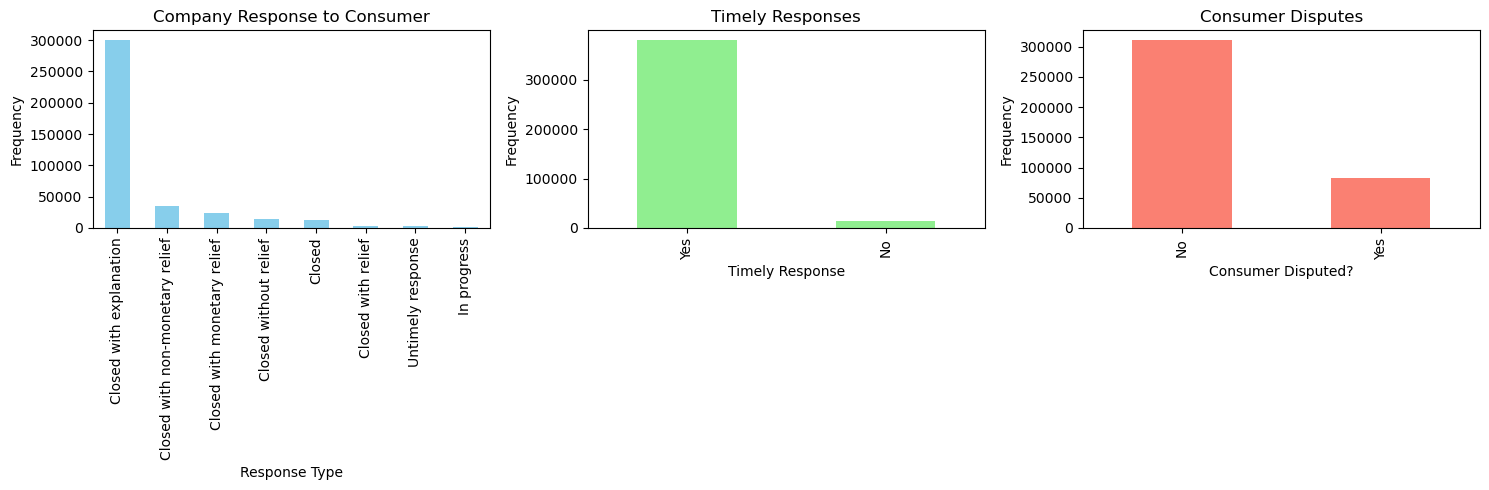

In [38]:
# Count the frequency of different company responses
company_responses = df['company_response_to_consumer'].value_counts()

# Count the frequency of timely responses
timely_responses = df['timely_response'].value_counts()

# Count the frequency of consumer disputes
consumer_disputes = df['consumer_disputed?'].value_counts()

# Visualize the results
plt.figure(figsize=(15, 5))

# Plot company responses
plt.subplot(1, 3, 1)
company_responses.plot(kind='bar', color='skyblue')
plt.title('Company Response to Consumer')
plt.xlabel('Response Type')
plt.ylabel('Frequency')

# Plot timely responses
plt.subplot(1, 3, 2)
timely_responses.plot(kind='bar', color='lightgreen')
plt.title('Timely Responses')
plt.xlabel('Timely Response')
plt.ylabel('Frequency')

# Plot consumer disputes
plt.subplot(1, 3, 3)
consumer_disputes.plot(kind='bar', color='salmon')
plt.title('Consumer Disputes')
plt.xlabel('Consumer Disputed?')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


From the visualization, it appears that the most common company response to consumers is "Closed with explanation," indicating that companies often provide explanations or resolutions to consumer complaints. Additionally, a majority of responses are timely, suggesting that companies strive to address complaints promptly. However, it's notable that a significant portion of consumers do not dispute the resolutions provided by the companies, indicating a level of satisfaction or acceptance with the outcomes.

The prevalence of "Closed with explanation" as the most common company response implies that many complaints may arise from misunderstandings or miscommunication regarding bank services. By providing explanations, financial institutions aim to clarify misunderstandings and address consumer concerns, suggesting a focus on improving communication and transparency to enhance customer satisfaction.

In [43]:
import plotly.express as px

# Create a choropleth map for the distribution of complaints across states
state_complaints = df['state'].value_counts().reset_index()
state_complaints.columns = ['state', 'complaints']

fig = px.choropleth(state_complaints, 
                    locations='state', 
                    locationmode='USA-states', 
                    scope='usa',
                    color='complaints', 
                    hover_name='state', 
                    color_continuous_scale='Blues',
                    title='Distribution of Complaints Across States')
fig.show()

# Create a treemap for the distribution of complaints across products and sub-products
product_complaints = df.groupby(['product', 'sub_product']).size().reset_index(name='complaints')
fig = px.treemap(product_complaints, 
                 path=['product', 'sub_product'], 
                 values='complaints', 
                 title='Distribution of Complaints Across Products and Sub-Products')
fig.show()



The fact that California has the highest number of complaints suggests that there may be specific challenges or issues within the state's financial services sector that need attention or improvement. Additionally, the observation that mortgage-related complaints are the highest indicates potential issues or dissatisfaction related to mortgage products or services in general. 

**Conclusion:**

In this project, I analyzed consumer complaints about financial products and services using Python. Here's a summary of my work and the key insights:

1. **Data Exploration and Preprocessing:**
   - I obtained the consumer complaints dataset from Kaggle and explored its structure and contents.
   - I identified missing values and handled them appropriately, dropping columns with a high percentage of missing data.
   - The dataset contained information about various aspects of complaints, including product types, issues, company responses, and more.

2. **Analysis and Visualization:**
   - I visualized the distribution of complaints over time, identifying trends and fluctuations in complaint volume.
   - The analysis revealed an increasing trend in complaints over the years, with a notable decrease in 2016, suggesting improvements in addressing consumer concerns by financial institutions.
   - I explored common issues reported by consumers and visualized them using bar charts, highlighting the most frequent issues such as loan modifications, collections, and payments.
   - Sentiment analysis was not feasible due to the absence of consumer complaint narratives, which were largely missing from the dataset.

3. **Named Entity Recognition (NER):**
   - I considered applying NER techniques to extract meaningful entities from consumer complaint narratives. However, due to a high percentage of missing data in the narrative column, this approach was not feasible.

4. **Insights:**
   - California emerged as the state with the highest number of complaints, indicating potential challenges or issues within its financial services sector.
   - Mortgage-related complaints were prevalent, suggesting issues or dissatisfaction with mortgage products or services.
   - Most complaints were closed with an explanation, indicating efforts by financial institutions to address consumer concerns promptly.
   - The majority of responses were timely, indicating a focus on addressing complaints in a timely manner.
   - A significant portion of consumers did not dispute the resolutions provided by companies, suggesting a level of satisfaction or acceptance with the outcomes.

**Overall, the analysis provides valuable insights into consumer complaints about financial products and services, highlighting areas for improvement and opportunities for enhancing customer satisfaction and regulatory compliance in the financial marketplace.**
